In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
from scipy import signal
import pandas as pd
import statsmodels.stats.diagnostic as sm
import math
import obspy
from obspy.signal.detrend import polynomial
from statsmodels.tsa import stattools

In [2]:
dados = sc.loadmat('simcosta_sp1_clean2.mat')
freqanual =pd.read_csv('freqanual.dat')
fu =pd.read_csv('fu.dat')
tu =pd.read_csv('tu.dat')
freqanual=np.array(freqanual)
fu=np.array(fu)
tu=np.array(tu)
chla2 = dados['chla2']
T2 = dados['T2']
S2 = dados['S2']
Turb2 = dados['Turb2']
t = dados['t']
CDOM2 = dados['CDOM2']
plt.style.use('ggplot')

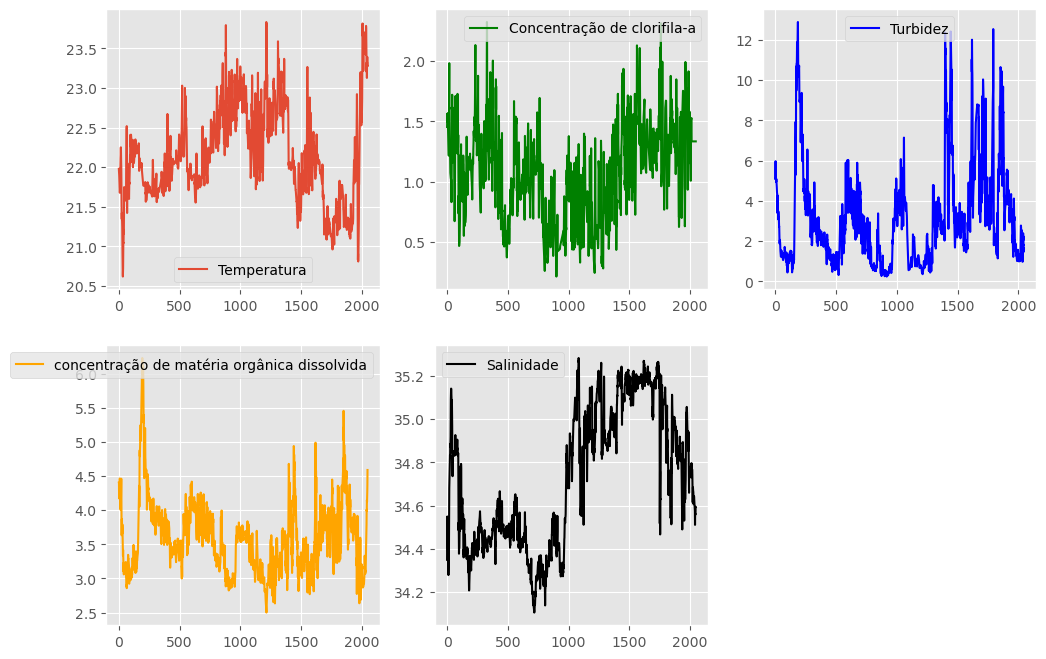

In [3]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(T2[0,:],label='Temperatura')
plt.legend()
plt.subplot(232)
plt.plot(chla2[0,:],label='Concentração de clorifila-a',color='green')
plt.legend()
plt.subplot(233)
plt.plot(Turb2[0,:],label='Turbidez',color='b')
plt.legend()
plt.subplot(234)
plt.plot(CDOM2[0,:],label='concentração de matéria orgânica dissolvida',color='orange')
plt.legend()
plt.subplot(235)
plt.plot(S2[0,:],label='Salinidade',color='black')
plt.legend()

In [4]:
T1 = signal.savgol_filter(T2[0,:],71,2)
chla = signal.savgol_filter(chla2[0,:],71,2)
Turb = signal.savgol_filter(Turb2[0,:],71,2)
CDOM = signal.savgol_filter(CDOM2[0,:],71,2)
S = signal.savgol_filter(S2[0,:],71,2)

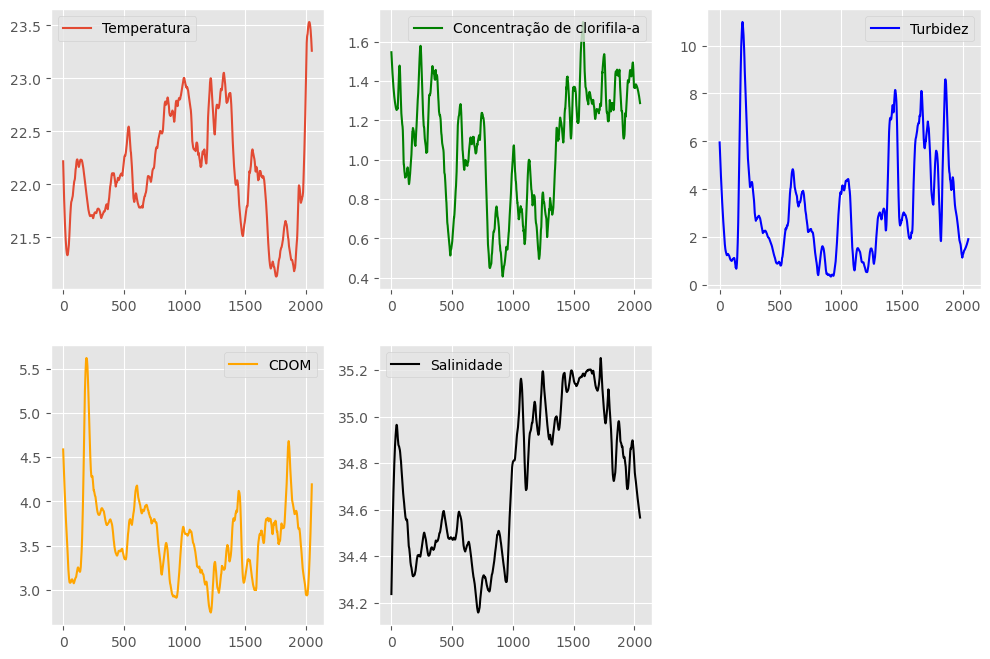

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(T1,label='Temperatura')
plt.legend()
plt.subplot(232)
plt.plot(chla,label='Concentração de clorifila-a',color='green')
plt.legend()
plt.subplot(233)
plt.plot(Turb,label='Turbidez',color='b')
plt.legend()
plt.subplot(234)
plt.plot(CDOM,label='CDOM',color='orange')
plt.legend()
plt.subplot(235)
plt.plot(S,label='Salinidade',color='black')
plt.legend()

In [6]:
altaT1 = T2[0,:]-T1
altachla = chla2[0,:]-chla
altaTurb = Turb2[0,:]-Turb
altaCDOM = CDOM2[0,:]-CDOM
altaS= S2[0,:]-S

In [7]:
fT, PT = signal.welch(altaT1)
fC, Pc = signal.welch(altachla)
fTu,PTu =signal.welch(altaTurb) 
fC,PC=signal.welch(altaCDOM)
fS,PS=signal.welch(altaS)

bfT, bPT = signal.welch(T1)
bfC, bPc = signal.welch(chla)
bfTu,bPTu =signal.welch(Turb) 
bfC,bPC=signal.welch(CDOM)
bfS,bPS=signal.welch(S)

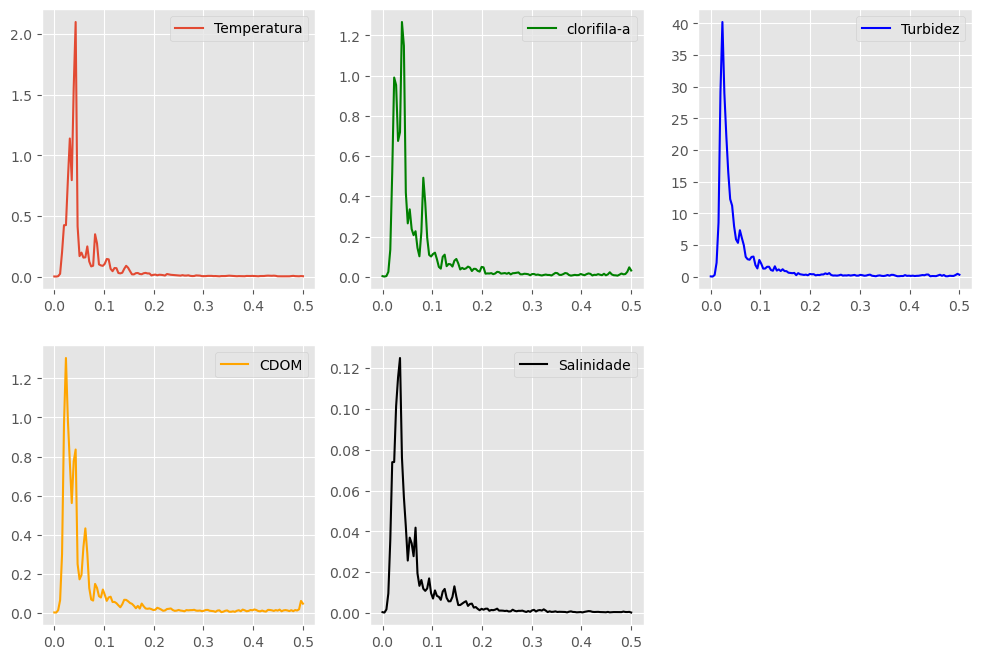

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(fT, PT,label='Temperatura')
plt.legend()
plt.subplot(232)
plt.plot(fC, Pc,label='clorifila-a',color='green')
plt.legend()
plt.subplot(233)
plt.plot(fTu,PTu ,label='Turbidez',color='b')
plt.legend()
plt.subplot(234)
plt.plot(fC,PC,label='CDOM',color='orange')
plt.legend()
plt.subplot(235)
plt.plot(fS,PS,label='Salinidade',color='black')
plt.legend()

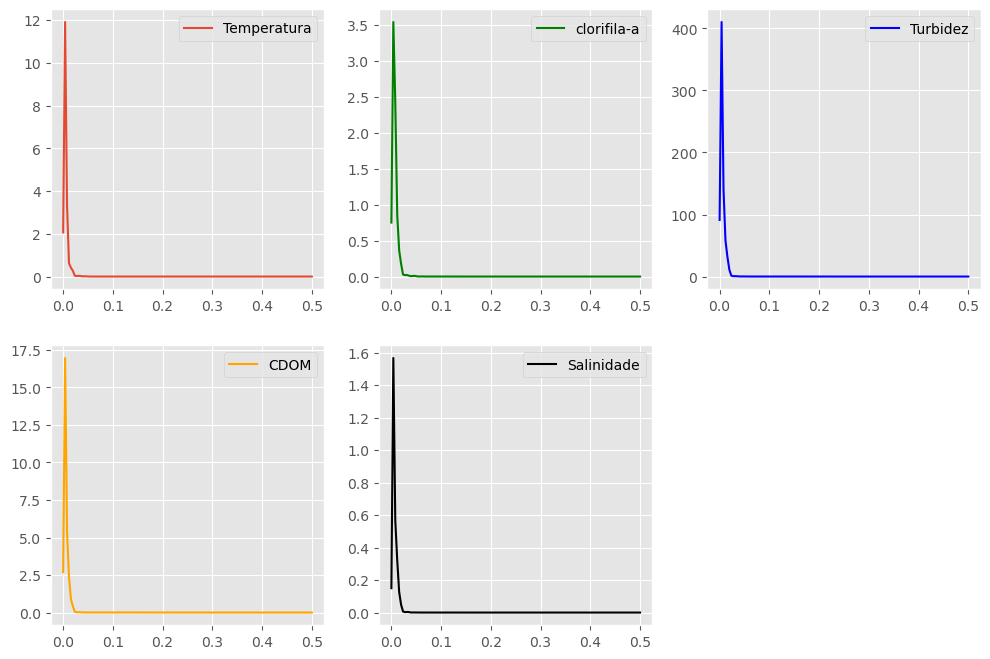

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(bfT, bPT,label='Temperatura')
plt.legend()
plt.subplot(232)
plt.plot(bfC, bPc,label='clorifila-a',color='green')
plt.legend()
plt.subplot(233)
plt.plot(bfTu,bPTu ,label='Turbidez',color='b')
plt.legend()
plt.subplot(234)
plt.plot(bfC,bPC,label='CDOM',color='orange')
plt.legend()
plt.subplot(235)
plt.plot(bfS,bPS,label='Salinidade',color='black')
plt.legend()

In [10]:
fa,Pa=signal.welch(freqanual[:,0])

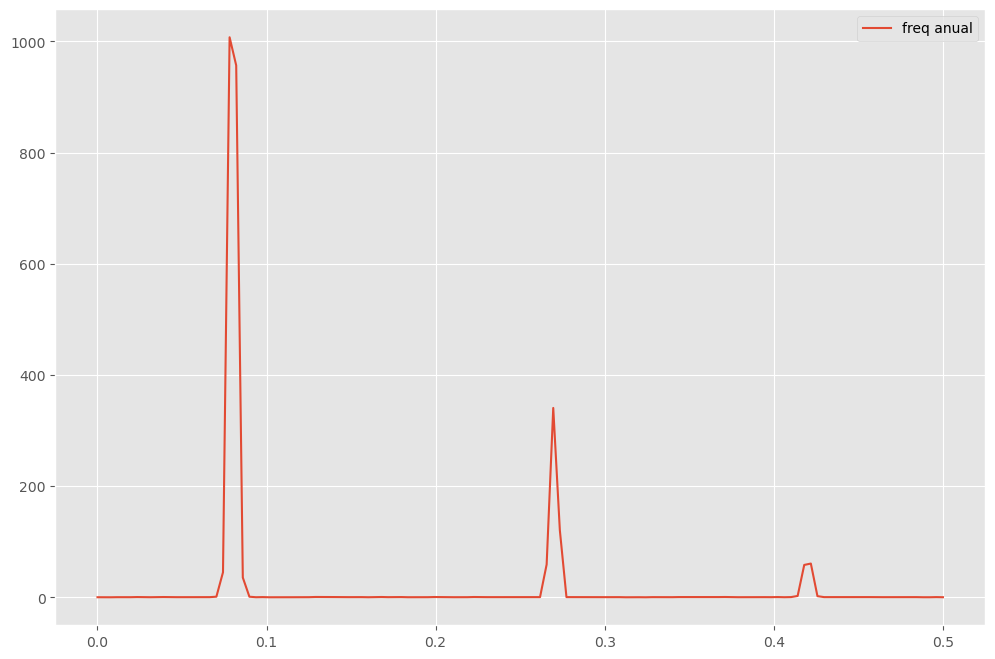

In [11]:
plt.figure(figsize=(12,8))
plt.plot(fa, Pa,label='freq anual')
plt.legend()

In [12]:
t = np.arange(0, 10.000, 0.005)
y = freqanual[:,0]
f = 110
y = y + 3 * np.sin(2 * np.pi * f * t)

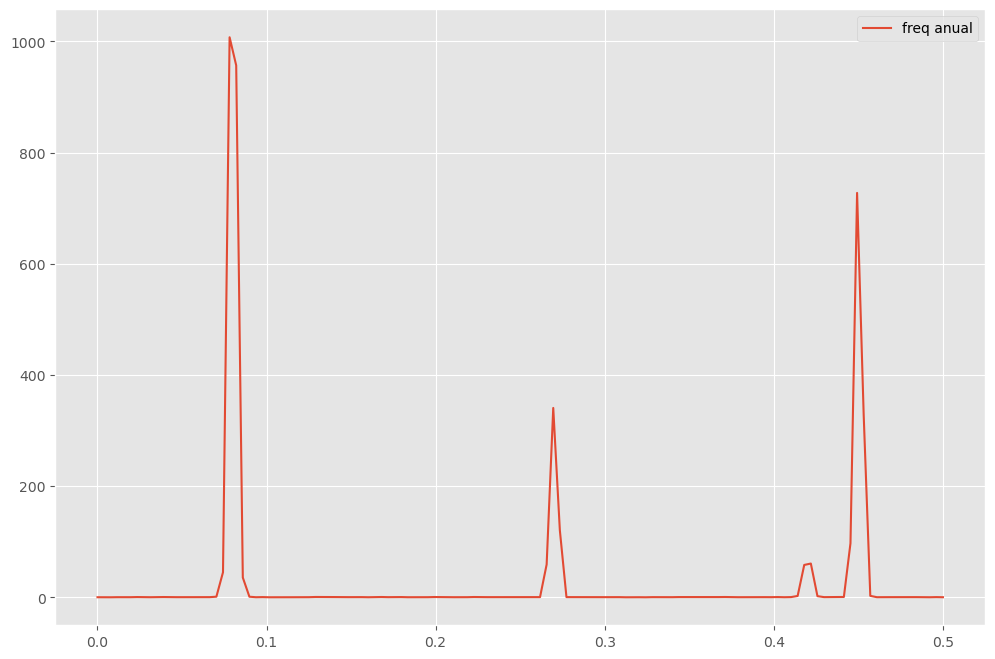

In [13]:
fra,Pra=signal.welch(y)
plt.figure(figsize=(12,8))
plt.plot(fra, Pra,label='freq anual')
plt.legend()

In [14]:
logbinsfu = np.logspace(np.log10(-11.84789),np.log10(8.557968),11)
logbinstu = np.logspace(np.log10(np.min(tu[:,0])),np.log10(np.max(tu[:,0])),11)

/tmp/ipykernel_13223/1234589897.py:1: RuntimeWarning: invalid value encountered in log10
  logbinsfu = np.logspace(np.log10(-11.84789),np.log10(8.557968),11)


/tmp/ipykernel_13223/1601172247.py:6: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(fu[:,0]),label='Dados independentes - variável x',color='g')


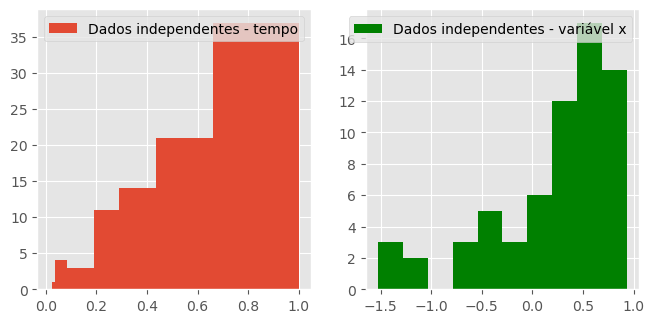

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.hist(tu[:,0], bins=logbinstu,label='Dados independentes - tempo')
plt.legend()
plt.subplot(232)
plt.hist(np.log10(fu[:,0]),label='Dados independentes - variável x',color='g')
plt.legend()

In [25]:
pgram = signal.lombscargle(tu[:,0], fu[:,0], 1/tu[:,0] ,normalize=True)

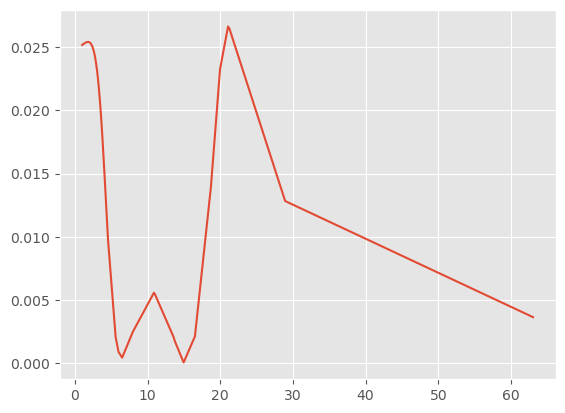

In [26]:
plt.plot(1/tu[:,0], pgram)